In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder


In [54]:
df=pd.read_csv("D:\\dsml\\ML\\New folder\\Employee.csv")

In [55]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [57]:
for i in df.columns:
    unique=df[i].unique()
    print(f"Column :{i}")
    print(f"Unique value :{unique}")
    print(f"lenth :{len(unique)}")
    

Column :Company
Unique value :['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
lenth :7
Column :Age
Unique value :[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
lenth :30
Column :Salary
Unique value :[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
lenth :41
Column :Place
Unique value :['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
lenth :12
Column :Country
Unique value :['India']
lenth :1
Column :Gender
Unique value :[0 1]
lenth :2


In [58]:
#There is both infosys and inosys pvt lmt in company we replace it to infosys
df['Company']=df['Company'].replace({'Infosys Pvt Lmt':'Infosys'})

In [59]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant'], dtype=object)

In [60]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [61]:

df.describe(include='object')

,Company,Place,Country
count,140,134,148
unique,5,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [62]:
#there is 0 in age we need to change that
median_age = int(df['Age'].median() ) # Calculate median
df['Age'] = df['Age'].replace(0, median_age) # Replace 0 with median
df['Age']=df['Age'].fillna(median_age)

In [63]:
df['Age'].unique()

array([20., 30., 35., 40., 23., 32., 34., 45., 18., 22., 37., 50., 21.,
       46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44., 33.,
       17., 54.])

In [64]:
df.isnull().sum()

Company     8
Age         0
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [65]:
sal=df['Salary'].median()
df['Salary'] = df['Salary'].fillna(sal)

In [66]:
df['Salary'].unique()

array([5000., 2300., 3000., 4000., 6000., 7000., 8000., 9000., 1089.,
       1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943., 8345.,
       9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202., 9024.,
       4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787., 3454.,
       5654., 5009., 5098., 3033.])

In [67]:
df.isnull().sum()

Company     8
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [68]:
cat=df.select_dtypes(include='object')
cat

,Company,Place,Country
0,TCS,Chennai,India
1,Infosys,Mumbai,India
2,TCS,Calcutta,India
3,Infosys,Delhi,India
4,TCS,Mumbai,India
...,...,...,...
143,TCS,Calcutta,India
144,Infosys,Calcutta,India
145,Infosys,Delhi,India
146,TCS,Mumbai,India


In [69]:
for i in cat:
    df[i]=df[i].fillna(df[i].mode()[0])

In [70]:
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [71]:
df.duplicated().sum()

5

In [72]:
df=df.drop_duplicates()

In [73]:
df.duplicated().sum()

0

In [74]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [75]:
numeric=['Age','Salary']
numeric

['Age', 'Salary']

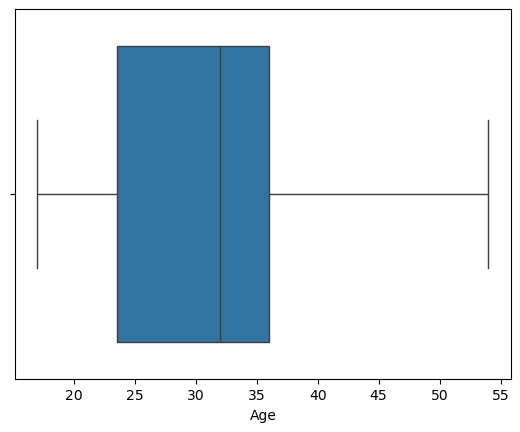

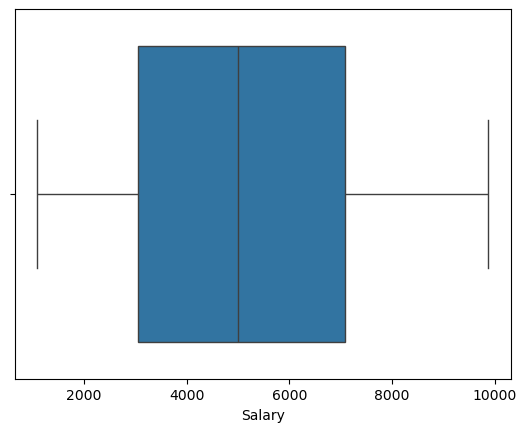

In [76]:
for i in numeric:
    sns.boxplot(data=df,x=df[i])
    plt.show()

In [77]:
#Filter the data with age >40 and salary<5000
f_data=df[(df['Age']>40) & (df['Salary']<5000)]
f_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


There is no outlier so no outlier treatment required

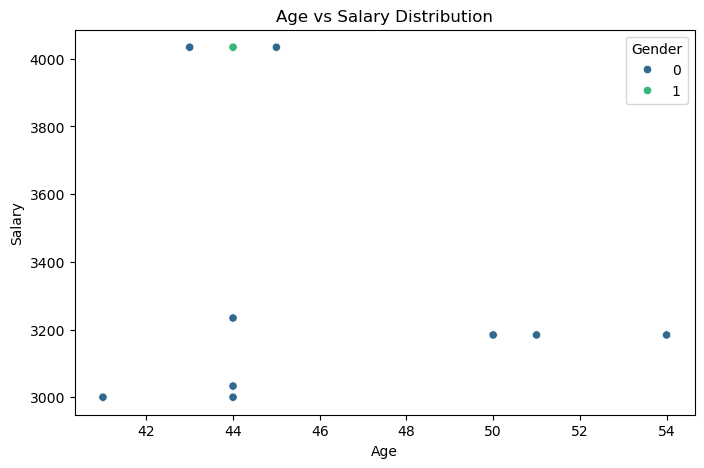

In [79]:
#Plot the chart with age and salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=f_data, x='Age', y='Salary', hue='Gender', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Distribution')
plt.show()

In [80]:
value=df['Place'].value_counts()
value

Place
Mumbai        47
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

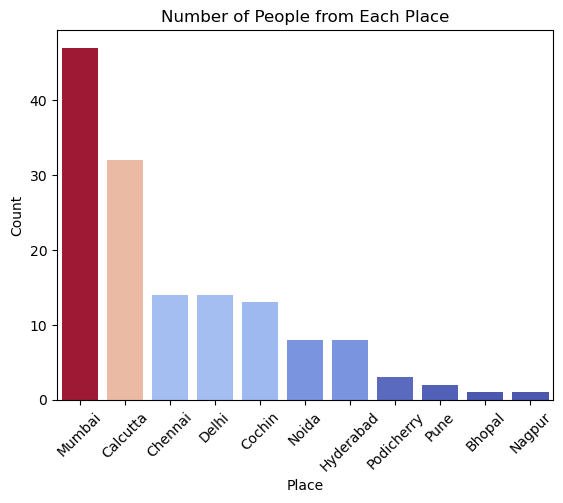

In [81]:

sns.barplot(x=value.index, y=value.values,hue=value.values,palette='coolwarm',legend=False)
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45) 
plt.show()


In [82]:
#onehot encoding
ohe=pd.get_dummies(df).astype(int)
ohe

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,30,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,35,2300,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,40,3000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,23,4000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22,8202,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
143,33,9024,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
145,44,4034,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
146,33,5034,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [83]:
data = df.select_dtypes(include=['object'])
data

,Company,Place,Country
0,TCS,Chennai,India
1,Infosys,Mumbai,India
2,TCS,Calcutta,India
3,Infosys,Delhi,India
4,TCS,Mumbai,India
...,...,...,...
142,Infosys,Mumbai,India
143,TCS,Calcutta,India
145,Infosys,Delhi,India
146,TCS,Mumbai,India


In [84]:
#labelencoding
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(df[i])
   
df
    


C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_14892\3273858290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_14892\3273858290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_14892\3273858290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Company,Age,Salary,Place,Country,Gender
0,3,20.0,5000.0,2,0,0
1,2,30.0,5000.0,6,0,0
2,3,35.0,2300.0,1,0,0
3,2,40.0,3000.0,4,0,0
4,3,23.0,4000.0,6,0,0
...,...,...,...,...,...,...
142,2,22.0,8202.0,6,0,0
143,3,33.0,9024.0,1,0,1
145,2,44.0,4034.0,4,0,1
146,3,33.0,5034.0,6,0,1


In [85]:
numer=['Age','Salary']
numer

['Age', 'Salary']

In [86]:
#Standardscale
ss=StandardScaler()
df[numer]=ss.fit_transform(df[numer])

C:\Users\harikrishnan\AppData\Local\Temp\ipykernel_14892\1570727366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numer]=ss.fit_transform(df[numer])


In [87]:
df

,Company,Age,Salary,Place,Country,Gender
0,3,-1.461497,-0.101183,2,0,0
1,2,-0.247121,-0.101183,6,0,0
2,3,0.360067,-1.240156,1,0,0
3,2,0.967255,-0.944866,4,0,0
4,3,-1.097185,-0.523025,6,0,0
...,...,...,...,...,...,...
142,2,-1.218622,1.249554,6,0,0
143,3,0.117192,1.596308,1,0,1
145,2,1.453005,-0.508682,4,0,1
146,3,0.117192,-0.086840,6,0,1


In [126]:
ohe

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,30,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,35,2300,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,40,3000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,23,4000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22,8202,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
143,33,9024,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
145,44,4034,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
146,33,5034,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [130]:
#minmax scaling
mm=MinMaxScaler()
ohe[numer]=mm.fit_transform(ohe[numer])
ohe

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0.081081,0.445089,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.351351,0.445089,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.486486,0.137817,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.621622,0.217480,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.162162,0.331285,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.135135,0.809491,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
143,0.432432,0.903039,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
145,0.729730,0.335154,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
146,0.432432,0.448959,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
